In [57]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [58]:
plt.rcParams['figure.figsize'] = [12,5]

# Import

In [59]:
## Img 1 Confocal
#tuple import
cv_img_1_con_RFP = cv.imreadmulti('Data/1/confocal/1RFP.TIF', flags=2)[1]
cv_img_1_con_CY5 = cv.imreadmulti('Data/1/confocal/1CY5.TIF', flags=2)[1]

print(type(cv_img_1_con_RFP))

print("Multilayer TIFF shapes:")
print(len(cv_img_1_con_RFP))
print(cv_img_1_con_CY5)

# Img 1 superresoluted
#tuple import
cv_img_1_str_RFP = cv.imreadmulti('Data/1/super_resolution/1RFP.TIF', flags=2)[1]
cv_img_1_str_CY5 = cv.imreadmulti('Data/1/super_resolution/1CY5.TIF', flags=2)[1]



<class 'list'>
Multilayer TIFF shapes:
24
[array([[131, 130, 129, ..., 125, 126, 127],
       [127, 126, 125, ..., 121, 123, 124],
       [123, 123, 122, ..., 118, 120, 121],
       ...,
       [119, 119, 118, ..., 124, 124, 123],
       [119, 117, 115, ..., 122, 122, 122],
       [117, 116, 116, ..., 120, 121, 125]], dtype=uint16), array([[125, 124, 124, ..., 124, 124, 124],
       [120, 120, 120, ..., 121, 121, 121],
       [118, 118, 118, ..., 119, 120, 120],
       ...,
       [115, 116, 117, ..., 123, 122, 120],
       [114, 114, 116, ..., 122, 119, 117],
       [115, 116, 120, ..., 117, 116, 118]], dtype=uint16), array([[127, 126, 124, ..., 126, 126, 125],
       [123, 122, 120, ..., 121, 121, 121],
       [120, 120, 119, ..., 118, 118, 117],
       ...,
       [117, 117, 118, ..., 124, 122, 121],
       [118, 117, 116, ..., 121, 121, 121],
       [123, 123, 119, ..., 125, 126, 127]], dtype=uint16), array([[127, 125, 125, ..., 124, 123, 122],
       [123, 121, 121, ..., 120, 119,

# Analysis

## Image 1, structured illumination, slice 16 (index = 15)

RFP max camera value, layer  15 : 3431
CY5 max camera value, layer  15 : 23


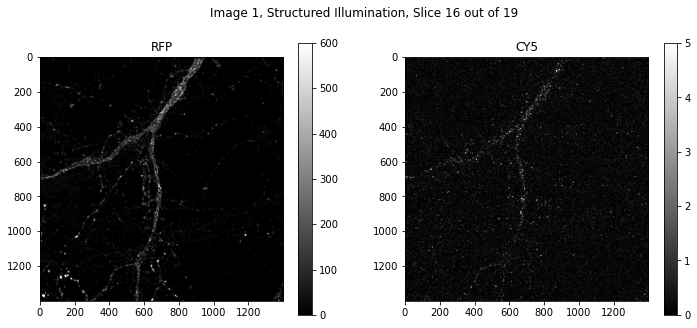

In [60]:
N_layers = len(cv_img_1_str_RFP)
ii = 15

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 1, Structured Illumination, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(cv_img_1_str_RFP[ii], cmap="gray")
pos1.set_clim(0,600)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("RFP")




pos2 = ax2.imshow(cv_img_1_str_CY5[ii], cmap="gray")
pos2.set_clim(0,5)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("CY5")

print("RFP max camera value, layer ", ii, ":", np.amax(cv_img_1_str_RFP[ii]))
print("CY5 max camera value, layer ", ii, ":", np.amax(cv_img_1_str_CY5[ii]))



## Gaussian thresholding

<class 'numpy.ndarray'>
(1400, 1400)
<class 'numpy.ndarray'>
[[ 0  0  1 ...  0  0  0]
 [ 6  7  7 ...  1  0  0]
 [ 6  5  3 ...  1  1  1]
 ...
 [ 4  7  5 ... 38 39 32]
 [ 2  4  0 ... 49 48 36]
 [ 0  3  1 ... 55 36 23]]


Text(0.5, 1.0, 'Binary image, Gaussian thresholding')

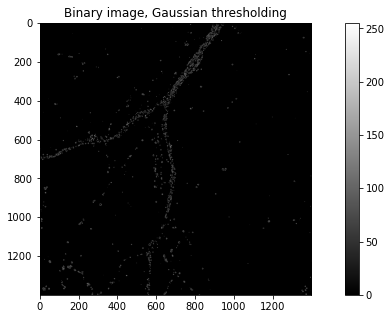

In [61]:
#test_img = cv_img_1_str_RFP[ii]
#img = cv.cvtColor(test_img, cv.COLOR_BGR2GRAY)

print(type(cv_img_1_str_RFP[ii]))
print(cv_img_1_str_RFP[ii].shape)

test_img = np.array(cv_img_1_str_RFP[ii],dtype='uint8')

print(type(test_img))
print(test_img)


blockSize = 9
C = -70
th3 = cv.adaptiveThreshold(test_img, np.amax(test_img), cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,blockSize,C)


fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(th3, cmap="gray")
fig.colorbar(pos, ax=ax)
plt.title("Binary image, Gaussian thresholding")

# Axon Slice

Text(0.5, 1.0, 'Binary image, Gaussian thresholding')

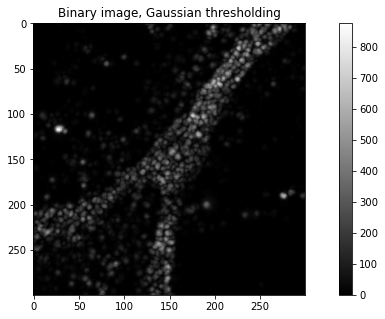

In [62]:
x_center = 650
y_center = 400

width = 300

x_bound_low = int(x_center-width/2)
x_bound_up = int(x_center+width/2)

y_bound_low = int(y_center-width/2)
y_bound_up = int(y_center+width/2)


slice_img = cv_img_1_str_RFP[ii][y_bound_low:y_bound_up,x_bound_low:x_bound_up]

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(slice_img, cmap="gray")
fig.colorbar(pos, ax=ax)
plt.title("Binary image, Gaussian thresholding")

Text(0.5, 1.0, 'Binary image, Gaussian thresholding')

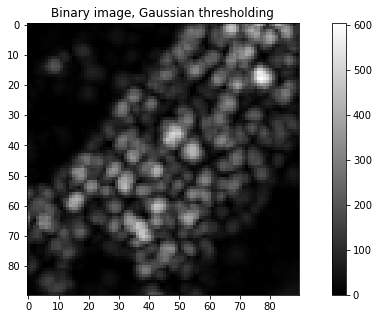

In [63]:
x_center = 650
y_center = 400

width = 90

x_bound_low = int(x_center-width/2)
x_bound_up = int(x_center+width/2)

y_bound_low = int(y_center-width/2)
y_bound_up = int(y_center+width/2)


slice_img_2 = cv_img_1_str_RFP[ii][y_bound_low:y_bound_up,x_bound_low:x_bound_up]

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(slice_img_2, cmap="gray")
fig.colorbar(pos, ax=ax)
plt.title("Binary image, Gaussian thresholding")

Text(0.5, 1.0, 'Binary image, Gaussian thresholding')

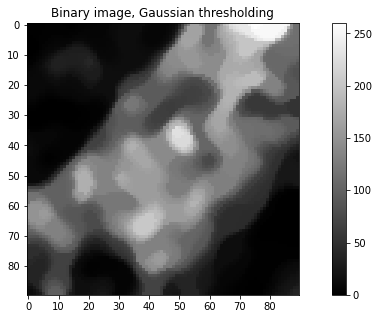

In [64]:
kernel_erosion = np.ones((6,6),np.uint8)
erosion = cv.erode(slice_img_2,kernel_erosion,iterations = 1)


kernel_dil = np.ones((3,3),np.uint8)
dilation = cv.dilate(slice_img_2,kernel_dil,iterations = 1)

median = cv.medianBlur(slice_img_2,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(median, cmap="gray")
fig.colorbar(pos, ax=ax)
plt.title("Binary image, Gaussian thresholding")

# Morphological filtering

In [65]:
img = cv_img_1_str_RFP[ii]

#Erosion on image RFP

kernel_op = np.ones((14,14),np.uint8)
kernel_cl = np.ones((2,2),np.uint8)




closing = cv.morphologyEx(slice_img_2, cv.MORPH_CLOSE, kernel_cl)
opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel_op)

median = cv.medianBlur(img,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
opening = cv.morphologyEx(median, cv.MORPH_OPEN, kernel_op)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel_cl)

ret,thresh1 = cv.threshold(closing,30,1,cv.THRESH_BINARY)



Text(0.5, 1.0, 'Binary image, Gaussian thresholding')

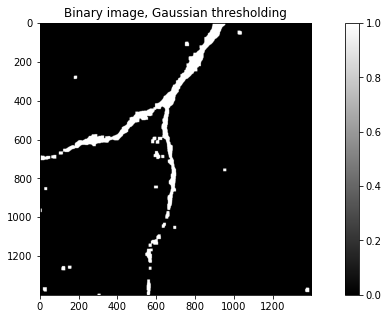

In [66]:
fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(thresh1, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Gaussian thresholding")

Text(0.5, 1.0, 'RFP')

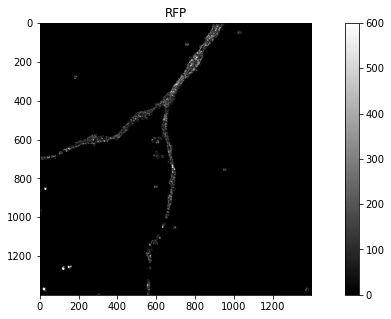

In [67]:
filtered = thresh1 * cv_img_1_str_RFP[ii]

fig = plt.figure()
ax = fig.gca()
pos = ax.imshow(filtered, cmap="gray")
pos.set_clim(0,600)
fig.colorbar(pos, ax=ax)
ax.set_title("RFP")

Ipotesi:
-togliere puntini isolati
-connettere dentriti/assoni con spessore sufficiente

# Image 2

In [72]:
## Img 2 Confocal
#tuple import
cv_img_2_con_RFP = cv.imreadmulti('Data/2/confocal/2RFP.TIF', flags=2)[1]
cv_img_2_con_CY5 = cv.imreadmulti('Data/2/confocal/2CY5.TIF', flags=2)[1]

print(type(cv_img_2_con_RFP))

print("Multilayer TIFF shapes:")
print(len(cv_img_2_con_RFP))
print(cv_img_2_con_CY5)

# Img 2 superresoluted
#tuple import
cv_img_2_str_RFP = cv.imreadmulti('Data/2/super_resolution/3_VCS_w1VCS_100X_RFP.TIF', flags=2)[1]
cv_img_2_str_CY5 = cv.imreadmulti('Data/2/super_resolution/3_VCS_w1VCS_100X_CY5.TIF', flags=2)[1]



<class 'list'>
Multilayer TIFF shapes:
0
[]


In [ ]:
N_layers = len(cv_img_1_str_RFP)
ii = 15

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 1, Structured Illumination, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(cv_img_1_str_RFP[ii], cmap="gray")
pos1.set_clim(0,600)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("RFP")




pos2 = ax2.imshow(cv_img_1_str_CY5[ii], cmap="gray")
pos2.set_clim(0,5)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("CY5")

print("RFP max camera value, layer ", ii, ":", np.amax(cv_img_1_str_RFP[ii]))
print("CY5 max camera value, layer ", ii, ":", np.amax(cv_img_1_str_CY5[ii]))



In [73]:
ii = 15
img = cv_img_2_str_RFP[ii]

#Erosion on image RFP

kernel_op = np.ones((14,14),np.uint8)
kernel_cl = np.ones((2,2),np.uint8)




closing = cv.morphologyEx(slice_img_2, cv.MORPH_CLOSE, kernel_cl)
opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel_op)

median = cv.medianBlur(img,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
opening = cv.morphologyEx(median, cv.MORPH_OPEN, kernel_op)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel_cl)

ret,thresh1 = cv.threshold(closing,30,1,cv.THRESH_BINARY)


Text(0.5, 1.0, 'RFP')

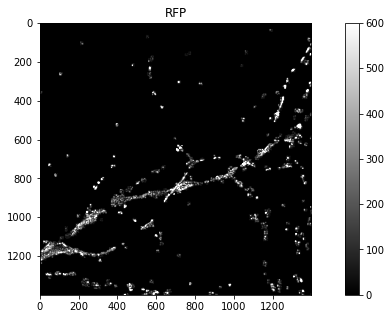

In [74]:
filtered = thresh1 * cv_img_2_str_RFP[ii]

fig = plt.figure()
ax = fig.gca()
pos = ax.imshow(filtered, cmap="gray")
pos.set_clim(0,600)
fig.colorbar(pos, ax=ax)
ax.set_title("RFP")